# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("airbnb_final.csv")

In [ ]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [ ]:
#Code goes here
df.shape


(7608, 15)

### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [ ]:
# 1.2.1 Code to identify data types goes here.
df.dtypes


host_id             float64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type        object
dtype: object

In [ ]:
# 1.2.3 change the host_id column to an integer
df['host_id'].fillna(0, inplace=True)
df['host_id'] = df['host_id'].astype(int)

### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [ ]:
# 1.3.1 check for duplicate values
df.duplicated().sum()


0

### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [ ]:
# 1.4.1 check for missing values
df.isnull().sum()

host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64

In [ ]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
df['price in $'].fillna(df['price in $'].mean(), inplace=True)

In [ ]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
df['price in $'].isnull().sum()

0

In [ ]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df['City'].fillna("Amsterdam", inplace=True)


In [ ]:
# 1.4.6 Verify that there are no more missing values in the 'City' column
df['City'].isnull().sum()

0

In [ ]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2=df.dropna()

### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [ ]:
# 1.5.1 code to show shapes of old and new dataframes
print('shape of df1 = ' ,df.shape)
print('shape of df2 = ' ,df2.shape)


shape of df1 =  (7608, 15)
shape of df2 =  (5108, 15)


In [ ]:
# 1.5.2 Code to verify no missing values
df2.isnull().sum()

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

In [ ]:
# 1.6.1 Code goes here
df=df.drop(columns=['latitude','longitude'])
df.head()

,host_id,neighbourhood,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484,Centrum-Oost,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324,De Pijp - Rivierenbuurt,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


In [ ]:
# 1.6.2 Show new shape
df.shape

(7608, 13)

### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [ ]:
# 1.7.1 Find and list the unique apartment tpyes.
df['Apartment_type'].unique()

array(['Condo', 'Townhouse', 'Rental unit', 'Houseboat', 'Guest suite',
       'Boutique hotel', 'Home', 'Loft', 'Bed and breakfast', 'Boat',
       'Guesthouse', nan, 'Farm stay', 'Place to stay', 'Chalet', 'Villa',
       'Tiny home', 'Bungalow', 'casa particular', 'Serviced apartment',
       'Barn', 'Hotel', 'Cabin', 'Aparthotel', 'Cottage', 'Nature lodge',
       'Earthen home', 'Vacation home', 'Tower', 'Hostel', 'Cave',
       'Camper/RV', 'Yurt', 'Tent'], dtype=object)

In [ ]:
# 1.7.2 Find and list the unuque bathroom types.
df['Bathroom_type'].unique()

array(['shared', 'private', nan], dtype=object)

### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [ ]:
# 1.8.1 Replace the strings with integers
df['Bathroom_type'] = df['Bathroom_type'].map({'shared': 0, 'private': 1})

In [ ]:
# 1.8.2 Verify the changes
df['Bathroom_type'].unique()

array([ 0.,  1., nan])

# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### 2.1. **Describe the data.**

In [ ]:
# Describe data here.
df.describe()


,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
count,7.608000e+03,7608.000000,7599.000000,7607.000000,6030.000000,7324.000000,7591.000000,6804.000000,7607.000000
mean,1.032046e+08,251.106081,4.915647,79.597082,4.821149,1.582469,1.575155,1.318783,0.924675
std,1.393504e+08,263.094906,33.283433,106.486090,0.214414,0.905413,0.901972,0.518660,0.263933
min,0.000000e+00,0.000000,1.000000,0.000000,1.670000,1.000000,1.000000,0.000000,0.000000
25%,9.924161e+06,148.000000,2.000000,0.000000,4.750000,1.000000,1.000000,1.000000,1.000000
50%,3.501297e+07,203.000000,3.000000,21.000000,4.880000,1.000000,1.000000,1.000000,1.000000
75%,1.402245e+08,300.000000,4.000000,145.000000,5.000000,2.000000,2.000000,1.500000,1.000000
max,5.183111e+08,12000.000000,1001.000000,365.000000,5.000000,17.000000,17.000000,17.000000,1.000000


### 2.2. **Identify significant correlations.**

In [ ]:
# 2.2.1 Build the correlation matrix
df_correlations=df.corr()


<ipython-input-77-209d98ea8e7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlations=df.corr()


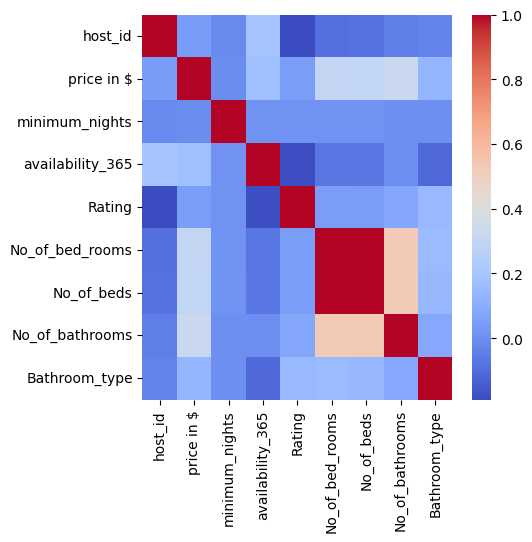

In [ ]:
# 2.2.2 Display the correlation matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df_correlations, cmap='coolwarm')
plt.show()

### 2.3. **Check if is there any multicollinearity.**

In [ ]:
#Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
# 2.3.1 Select all numerical columns *except* host_id.
# Select all numerical columns except 'host_id'
no_host_id_numeric_cols = df.select_dtypes(include=['number']).drop(columns=['host_id'])

In [ ]:
# 2.3.2 Make sure there are no missing (NaN) values
no_host_id_numeric_cols=no_host_id_numeric_cols.dropna()
no_host_id_numeric_cols.isna().sum()


price in $          0
minimum_nights      0
availability_365    0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

In [ ]:
# 2.3.3 Add a constant column for the VIF calculation
no_host_id_numeric_cols_constant = sm.add_constant(no_host_id_numeric_cols)


In [ ]:
# 2.3.4 Calculate the VIF for each of the columns and display the information.

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Features"] = no_host_id_numeric_cols_constant.columns
vif_data["VIF"] = [variance_inflation_factor(no_host_id_numeric_cols_constant.values, i) for i in range(len(no_host_id_numeric_cols_constant.columns))]
print(vif_data)


           Features         VIF
0             const  534.702345
1        price in $    1.201031
2    minimum_nights    1.000522
3  availability_365    1.115009
4            Rating    1.058145
5   No_of_bed_rooms         inf
6        No_of_beds         inf
7   No_of_bathrooms    1.327983
8     Bathroom_type    1.118510


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

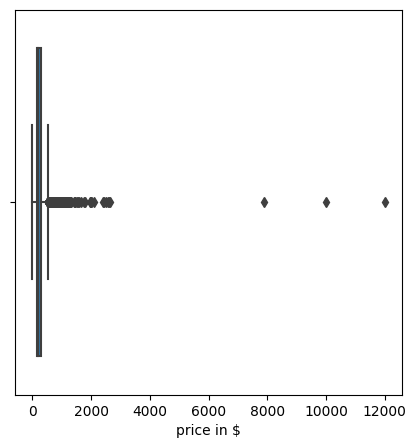

In [ ]:
# 2.4.1. Show boxplot of price in $
plt.figure(figsize=(5, 5))
sns.boxplot(x='price in $', data=df)
plt.show()

In [ ]:
# 2.4.2 Show the maximum price in $
df['price in $'].max()

12000.0

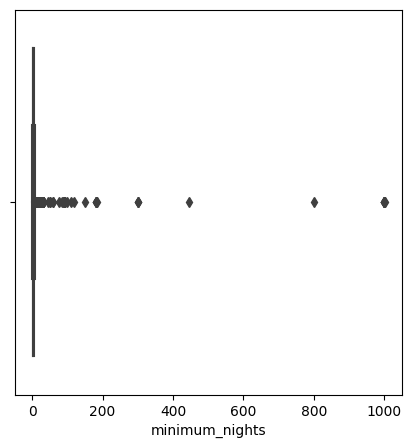

In [ ]:
# 2.4.3 Show a boxplot for minimum_nights
plt.figure(figsize=(5, 5))
sns.boxplot(x='minimum_nights', data=df)
plt.show()

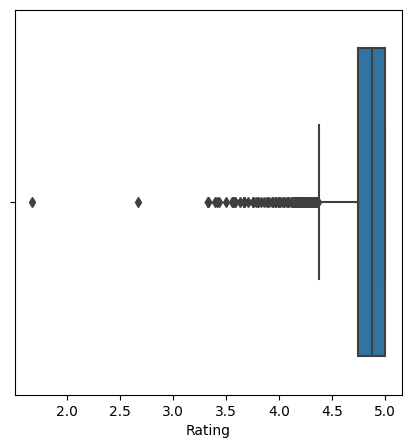

In [ ]:
# 2.4.4 Show a boxplot for Rating
plt.figure(figsize=(5, 5))
sns.boxplot(x='Rating', data=df)
plt.show()

In [ ]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.
def outliers(df, col,multiplier):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    df_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_outliers

In [ ]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)
outliers_price = outliers(df, 'price in $',1.5)
print("Outliers for 'price in $':")
print(outliers_price)


outliers_nights = outliers(df, 'minimum_nights',1.5)
print("Outliers for 'minimum_nights':")
print(outliers_nights)

outliers_rating = outliers(df, 'Rating',1.5)
print("Outliers for 'Rating':")
print(outliers_rating)

Outliers for 'price in $':
        host_id                           neighbourhood        room_type  \
0          3159  Oostelijk Havengebied - Indische Buurt     Private room   
1         59484                            Centrum-Oost     Private room   
2       1100324                 De Pijp - Rivierenbuurt  Entire home/apt   
3        748161                                Oud-Oost  Entire home/apt   
4         97647                            Centrum-West     Private room   
...         ...                                     ...              ...   
7603   16570501                  De Baarsjes - Oud-West  Entire home/apt   
7604  132654754                                  Osdorp  Entire home/apt   
7605   23932215                  De Baarsjes - Oud-West  Entire home/apt   
7606    4437313                                    Zuid  Entire home/apt   
7607   70167802                  De Baarsjes - Oud-West  Entire home/apt   

      price in $  minimum_nights  availability_365 Apartment

In [ ]:
# 2.4.7 Display the count of outliers in each selected column
count_outliers_price = len(outliers(df, 'price in $',1.5))
print("Outliers for 'price in $':",count_outliers_price)

count_outliers_nights = len(outliers(df, 'minimum_nights',1.5))
print("Outliers for 'minimum_nights':",count_outliers_nights)

count_outliers_rating = len(outliers(df, 'Rating',1.5))
print("Outliers for 'Rating':",count_outliers_rating)

Outliers for 'price in $': 7256
Outliers for 'minimum_nights': 7277
Outliers for 'Rating': 5776


In [ ]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.
outliers_price = outliers(df, 'price in $',3)
print("Outliers for 'price in $':")
print(outliers_price)


outliers_nights = outliers(df, 'minimum_nights',3)
print("Outliers for 'minimum_nights':")
print(outliers_nights)

outliers_rating = outliers(df, 'Rating',3)
print("Outliers for 'Rating':")
print(outliers_rating)

Outliers for 'price in $':
        host_id                           neighbourhood        room_type  \
0          3159  Oostelijk Havengebied - Indische Buurt     Private room   
1         59484                            Centrum-Oost     Private room   
2       1100324                 De Pijp - Rivierenbuurt  Entire home/apt   
3        748161                                Oud-Oost  Entire home/apt   
4         97647                            Centrum-West     Private room   
...         ...                                     ...              ...   
7603   16570501                  De Baarsjes - Oud-West  Entire home/apt   
7604  132654754                                  Osdorp  Entire home/apt   
7605   23932215                  De Baarsjes - Oud-West  Entire home/apt   
7606    4437313                                    Zuid  Entire home/apt   
7607   70167802                  De Baarsjes - Oud-West  Entire home/apt   

      price in $  minimum_nights  availability_365 Apartment

In [ ]:
# 2.4.9 Display the new count of outliers in each selected column
count_outliers_price = len(outliers(df, 'price in $',3))
print("Outliers for 'price in $':",count_outliers_price)

count_outliers_nights = len(outliers(df, 'minimum_nights',3))
print("Outliers for 'minimum_nights':",count_outliers_nights)
count_outliers_rating = len(outliers(df, 'Rating',3))

print("Outliers for 'Rating':",count_outliers_rating)


Outliers for 'price in $': 7484
Outliers for 'minimum_nights': 7357
Outliers for 'Rating':
5993




### 2.5. **Compute the Average Price for Each Type of Listing.**

In [ ]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type
avg_price_room_type = df.groupby('room_type')['price in $'].mean()

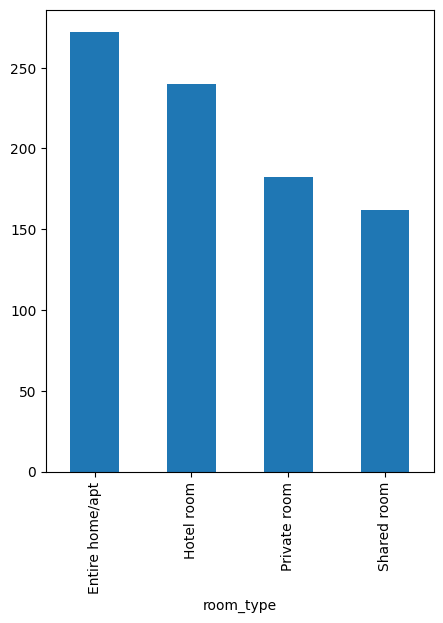

In [ ]:
# 2.5.2 Plot and display  the average price for each room type
plt.figure(figsize=(5, 6))
avg_price_room_type.plot(kind='bar')
plt.show()

### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [ ]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'
apt_type_counts = df['Apartment_type'].value_counts()
print(apt_type_counts)


Rental unit           3383
Condo                 1597
Home                   704
Townhouse              313
Bed and breakfast      311
Houseboat              240
Loft                   233
Boat                   144
Hotel                  118
Guest suite            109
Serviced apartment     106
Boutique hotel         102
Hostel                  56
Villa                   35
Guesthouse              33
Aparthotel              20
Place to stay           20
Vacation home           19
casa particular         17
Tiny home               10
Cabin                    9
Earthen home             5
Farm stay                5
Camper/RV                3
Tent                     3
Cottage                  3
Nature lodge             2
Chalet                   2
Tower                    1
Barn                     1
Cave                     1
Yurt                     1
Bungalow                 1
Name: Apartment_type, dtype: int64


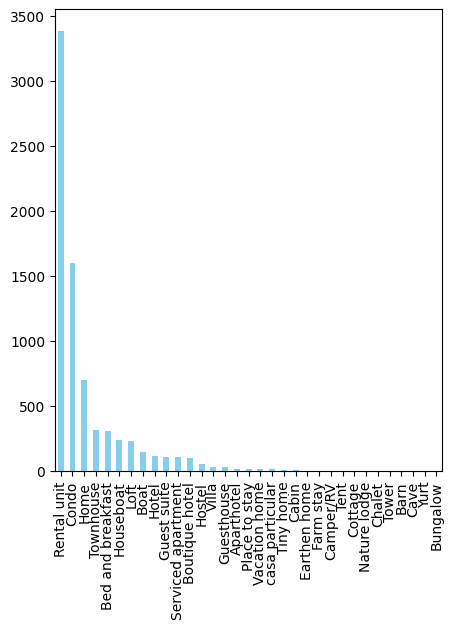

In [ ]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'
plt.figure(figsize=(5, 6))
apt_type_counts.plot(kind='bar', color='skyblue')
plt.show()

In [ ]:
# 2.6.3. Display the top 10 most common apartment types
print("Top 10 most common apartment types:")
print(apt_type_counts.head(10))

Top 10 most common apartment types:
Rental unit          3383
Condo                1597
Home                  704
Townhouse             313
Bed and breakfast     311
Houseboat             240
Loft                  233
Boat                  144
Hotel                 118
Guest suite           109
Name: Apartment_type, dtype: int64


### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [ ]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price
# Group the data by 'neighbourhood' and calculate the average price for each neighborhood
avg_price_neighborhood = df.groupby('neighbourhood')['price in $'].mean()
print("Top 5 most expensive neighborhoods based on average price:")
print(avg_price_neighborhood.sort_values(ascending=False).head(5))


Top 5 most expensive neighborhoods based on average price:
neighbourhood
Centrum-Oost               308.867269
Centrum-West               302.632830
Zuid                       281.211765
De Pijp - Rivierenbuurt    266.075810
Oud-Noord                  252.130058
Name: price in $, dtype: float64


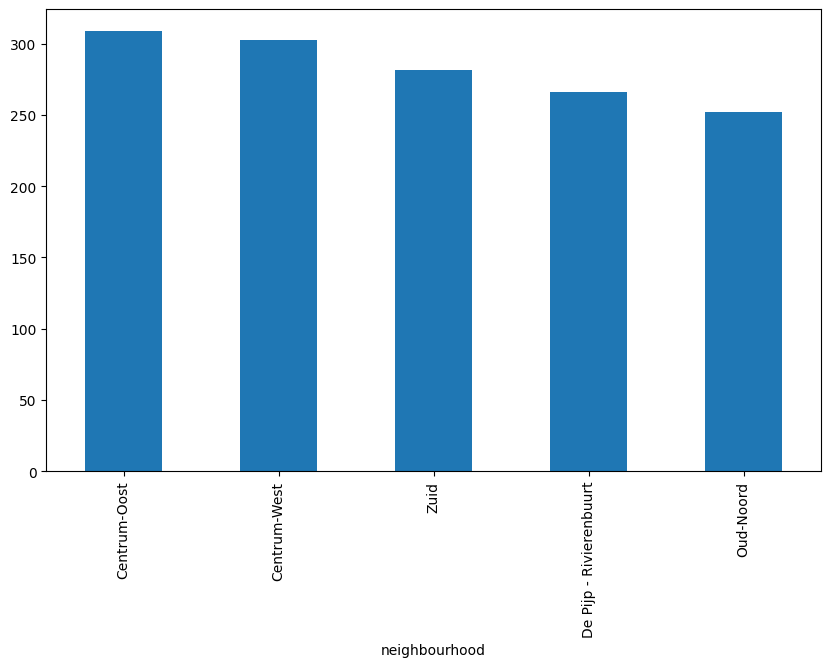

In [ ]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods
expensive_neighborhoods = avg_price_neighborhood.sort_values(ascending=False).head(5)
# Create a bar plot
plt.figure(figsize=(10, 6))
expensive_neighborhoods.plot(kind='bar')
plt.show()

### 2.8. **Which 'Apartment Types' Are Most and Least Frequently Available?**

In [ ]:
# 2.8.1 Count the frequency of each unique 'Apartment_type' to find the most and least commonly available types
most_common_apartment_type = apt_type_counts.idxmax()
least_common_apartment_type = apt_type_counts.idxmin()
print("Most commonly available Apartment Type:", most_common_apartment_type)
print("Least commonly available Apartment Type:", least_common_apartment_type)


Most commonly available Apartment Type: Rental unit
Least commonly available Apartment Type: Tower


In [ ]:
# 2.8.2 Find the top 5 most commonly available and the least commonly available apartment types
# Display the results
print("Top 5 most commonly available Apartment Types:")
print(apt_type_counts.head(5))
print("\nLeast commonly available Apartment Type:")
print(apt_type_counts.tail(5))


Top 5 most commonly available Apartment Types:
Rental unit          3383
Condo                1597
Home                  704
Townhouse             313
Bed and breakfast     311
Name: Apartment_type, dtype: int64

Least commonly available Apartment Type:
Tower       1
Barn        1
Cave        1
Yurt        1
Bungalow    1
Name: Apartment_type, dtype: int64


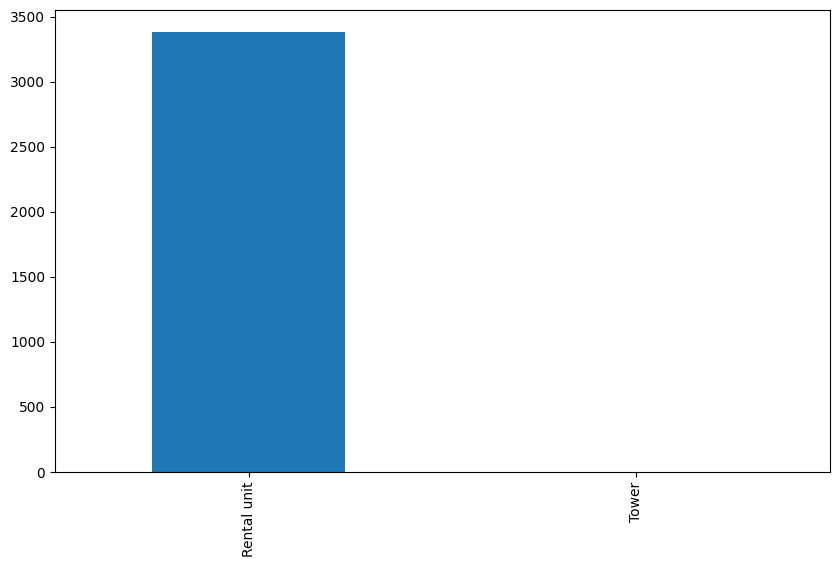

In [ ]:
# 2.8.3 Plot and display the most and least commonly available apartment types
plt.figure(figsize=(10, 6))
apt_type_counts[[most_common_apartment_type, least_common_apartment_type]].plot(kind='bar')
plt.show()